# Data Processing

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
vg_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
vg_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print "Num of rows: " + str(vg_df.shape[0]) # row count
print "Num of columns: " + str(vg_df.shape[1]) # col count
vg_df.info()

Num of rows: 16719
Num of columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
#Remove duplication
vg_df=vg_df.drop_duplicates(subset=None,keep='first',inplace=False)

#Remove whitespaces
vg_df["Platform"] = vg_df["Platform"].map(lambda x: x.strip())

In [6]:
pd.isnull(vg_df).sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
vg_df[pd.isnull(vg_df["Genre"]).values==True]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Drop rows with most columns of missing values
vg_df.drop([659,14246],inplace=True)

In [9]:
pd.isnull(vg_df).sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8580
Critic_Count       8580
User_Score         6702
User_Count         9127
Developer          6621
Rating             6767
dtype: int64

In [10]:
vg_df['Year_of_Release'].groupby(vg_df['Genre']).median()

Genre
Action          2009.0
Adventure       2009.0
Fighting        2005.0
Misc            2008.0
Platform        2004.0
Puzzle          2007.0
Racing          2005.0
Role-Playing    2008.0
Shooter         2007.0
Simulation      2008.0
Sports          2006.0
Strategy        2007.0
Name: Year_of_Release, dtype: float64

In [11]:
#'Year_of_Release' missing values are made up by median of each genre
for i in range(len(vg_df['Year_of_Release'])):
    if np.isnan(vg_df.iloc[i,2]):
        if vg_df.iloc[i,3]=="Action":
            vg_df.iloc[i,2]=2009
        elif vg_df.iloc[i,3]=="Adventure":
            vg_df.iloc[i,2]=2009
        elif vg_df.iloc[i,3]=="Misc":
            vg_df.iloc[i,2]=2008
        elif vg_df.iloc[i,3]=="Platform":
            vg_df.iloc[i,2]=2004
        elif vg_df.iloc[i,3]=="Puzzle":
            vg_df.iloc[i,2]=2007
        elif vg_df.iloc[i,3]=="Racing":
            vg_df.iloc[i,2]=2005
        elif vg_df.iloc[i,3]=="Role-Playing":
            vg_df.iloc[i,2]=2008
        elif vg_df.iloc[i,3]=="Shooter":
            vg_df.iloc[i,2]=2007
        elif vg_df.iloc[i,3]=="Simulation":
            vg_df.iloc[i,2]=2008
        elif vg_df.iloc[i,3]=="Sports":
            vg_df.iloc[i,2]=2006
        elif vg_df.iloc[i,3]=="Strategy":
            vg_df.iloc[i,2]=2007
        elif vg_df.iloc[i,3]=="Fighting":
            vg_df.iloc[i,2]=2005

In [12]:
#Remove logistic error
for i in range(len(vg_df['Year_of_Release'])):
    if vg_df.iloc[i,2]==2020:
        vg_df.iloc[i,2]=vg_df['Year_of_Release'].median()

# Visualization

Part 1. Platform

Figure 1.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

vg_plat=vg_df[["Name","Platform"]]
vg_plat=vg_plat.groupby(["Platform"],as_index=False).count()
vg_plat.columns=["Platform","Count"]
#vg_plat

In [14]:
new={}
for i in vg_df["Platform"]:
    if i not in new:
        new[i]=1
    else:
        new[i]+=1     

In [15]:
hs={'2600': "Atari",
 '3DO': "3DO",
 '3DS': "Nintendo",
 'DC': "Sega",
 'DS': "Nintendo",
 'GB': "Nintendo",
 'GBA': "Nintendo",
 'GC': "Nintendo",
 'GEN': "Sega",
 'GG': "Sega",
 'N64':"Nintendo",
 'NES':"Nintendo",
 'NG': "Nintendo",
 'PC': "NEC",
 'PCFX':"NEC",
 'PS': "Sony Computer Entertainment",
 'PS2': "Sony Computer Entertainment",
 'PS3': "Sony Computer Entertainment",
 'PS4': "Sony Computer Entertainment",
 'PSP': "Sony Computer Entertainment",
 'PSV': "Sony Computer Entertainment",
 'SAT':"Sega",
 'SCD': "Sega",
 'SNES':"Nintendo",
 'TG16': "NEC",
 'WS': "Namco Bandai Games",
 'Wii':"Nintendo",
 'WiiU':"Nintendo",
 'X360': "Microsoft Game Studios",
 'XB': "Microsoft Game Studios",
 'XOne': "Microsoft Game Studios"}
p=[]
for i in vg_plat["Platform"]:
    if i in hs.keys():
        p.append(hs[i])
vg_plat["Publisher"]=p
vg_plat=vg_plat.sort_values(by=["Publisher","Platform"])

In [16]:
p_distinct=[]
p_count=[]
count=0
for i in vg_plat["Publisher"]:
    if i not in p_distinct:
        p_distinct.append(i)
        p_count.append(count)
    count+=1
pcc=[]
for i in vg_plat["Count"]:
    pcc.append(i)
p_size=[]
previous=p_count[0]
count=0
for i in range(vg_plat.shape[0]):
    if i in p_count:
        if i==0:
            count+=1
            continue
        else:
            p_size.append(p_count[count]-p_count[count-1])
        count+=1
p_size.append(vg_plat.shape[0]-p_count[len(p_count)-1])
p_cnt=[]
for i in range(len(p_size)):
    count=0
    start=p_count[i]
    for j in range(p_size[i]):
        count+=pcc[start]
        start+=1
    p_cnt.append(count)

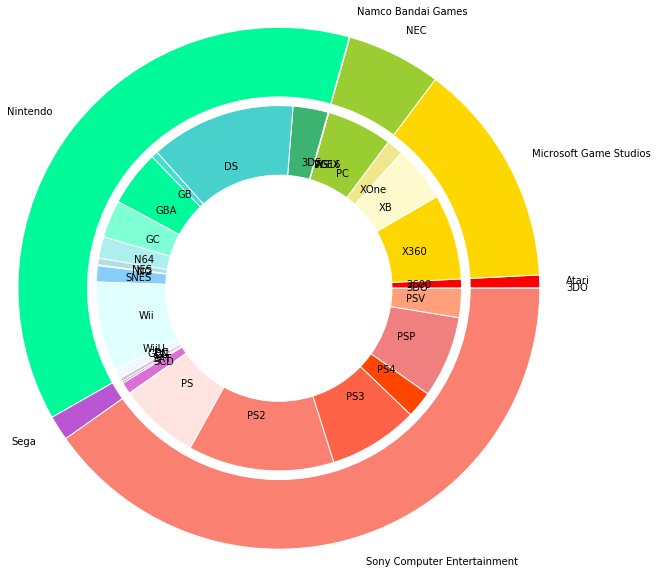

In [17]:
# Libraries
import matplotlib.pyplot as plt

%matplotlib inline
 
# Data
label_pub=p_distinct
size_pub=p_cnt
label_plat=list(vg_plat["Platform"].values)
size_plat=list(vg_plat["Count"].values)
color_pub=['#FFA500', '#FF0000', '#FFD700', '#9ACD32','#8FBC8F', '#00FA9A', '#BA55D3', '#FA8072',]
color_plat=['#FFA500', '#FF0000', '#FFD700', '#FFFACD', '#F0E68C', '#9ACD32', '#ADFF2F', '#7CFC00', '#8FBC8F', '#3CB371', '#48D1CC', '#40E0D0','#00FA9A',  '#7FFFD4', '#AFEEEE', '#B0E0E6', '#00BFFF', '#87CEFA','#E0FFFF', '#F0F8FF', '#D8BFD8', '#BA55D3', '#9400D3', '#DA70D6', '#FF69B4', '#FFE4E1', '#FA8072','#FF6347', '#FF4500', '#F08080','#FFA07A']

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(size_pub, colors=color_pub,radius=3, labels=label_pub )
plt.setp( mypie, width=0.8, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(size_plat, colors=color_plat,radius=2.9-0.8, labels=label_plat, labeldistance=0.7)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

Figure 2. Nintendo Platform Ratio Changed by Year

In [18]:
vg_gen=vg_df[["Name","Platform","Year_of_Release"]]
vg_gen=vg_gen.groupby(["Year_of_Release","Platform"],as_index=False).count()
vg_gen.columns=["Year","Platform","Count"]
#Adding publisher
g=[]
for i in vg_gen["Platform"]:
    if i in hs.keys():
        g.append(hs[i])
vg_gen["Publisher"]=g
vg_gen=vg_gen.sort_values("Year")

In [19]:
#Seperating into different groups
#In this section, we use 3 main publishers:"Microsoft Game Studios" ,"Nintendo","Sony Computer Entertainment"
gen_nintendo=vg_gen[vg_gen['Publisher'].isin(["Nintendo"])]
gen_nintendo=gen_nintendo[["Year","Platform","Count"]]
gen_microsoft=vg_gen[vg_gen['Publisher'].isin(["Microsoft Game Studios"])]
gen_microsoft=gen_microsoft[["Year","Platform","Count"]]
gen_sony=vg_gen[vg_gen['Publisher'].isin(["Sony Computer Entertainment"])]
gen_sony=gen_sony[["Year","Platform","Count"]]
year_nintendo=gen_nintendo.groupby("Year",as_index=False)["Count"].sum()
year_microsoft=gen_microsoft.groupby("Year",as_index=False)["Count"].sum()
year_sony=gen_sony.groupby("Year",as_index=False)["Count"].sum()
#Total count
y_total=vg_df[["Name","Year_of_Release"]]
y_total=y_total.groupby("Year_of_Release",as_index=False).count()
y_total.columns=["Year","Count"]
total_cnt=list(y_total["Count"].values)
#year:1980-2017
sum_y=year_nintendo["Year"].map(lambda x:str(int(x)))
sum_year=["1980","1981","1982"]
sum_year.extend(sum_y)
l2=["2017"]
sum_year.extend(l2)
#Make up for no value year
#Count for nintendoo
c1=year_nintendo["Count"].values
count_nintendo=[0,0,0]
count_nintendo.extend(c1)
l1=[0]
count_nintendo.extend(l1)
#Count for microsoft
c2=year_microsoft["Count"].values
count_microsoft=[0]*20
count_microsoft.extend(c2)
l2=[0]
count_microsoft.extend(l2)
#Count for sony
c3=year_sony["Count"].values
count_sony=[0]*15
count_sony.extend(c3)

#Ratio
ratio_nintendo=[]
ratio_microsoft=[]
ratio_sony=[]
for i in range(len(sum_year)):
    num1=count_nintendo[i]*1.0/total_cnt[i]
    ratio_nintendo.append(num1)
    num2=count_microsoft[i]*1.0/total_cnt[i]
    ratio_microsoft.append(num2)
    num3=count_sony[i]*1.0/total_cnt[i]
    ratio_sony.append(num3)
ratio_sony.pop()
ratio_sony.append(1)
nintendo={"Year":sum_year,"Ratio":ratio_nintendo}
microsoft={"Year":sum_year,"Ratio":ratio_microsoft}
sony={"Year":sum_year,"Ratio":ratio_sony}

In [20]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show

Loading BokehJS ...

In [21]:
p12= figure(plot_width=400, plot_height=400,
            title="Ratio Changes on Nintendo/ Microsoft/ Sony Platform",x_axis_type="datetime")

for data,name,color in zip([nintendo,microsoft,sony],["Nintendo","Microsoft","Sony"],Spectral4):
    df=pd.DataFrame(data)
    df["Year"]=pd.to_datetime(df["Year"])
    p12.line(df["Year"],df["Ratio"],line_width=2, color=color, alpha=0.8,
           muted_color=color, muted_alpha=0.2, legend=name)
p12.legend.location = "top_right"
p12.legend.click_policy="mute"
p12.legend.background_fill_alpha = 0.5
show(p12)
#Click on different legend

But there's still something to mention about data itself.  

There's only 3 records in "2017" and they all belong to sony.    

Thus, for 2017, the data is meaningless.

Figure 3.  Genre Distribution of Games on Nintendo Platform

In [22]:
genre=vg_df[["Name","Genre","Platform"]]
genre=genre.groupby(["Genre","Platform"],as_index=False).count()
genre.columns=["Genre","Platform","Count"]

In [23]:
m=[]
for i in genre["Platform"]:
    if i in hs.keys():
        m.append(hs[i])
genre["Publisher"]=m
idxg=[]
count=0
for i in genre["Publisher"]:
    if i=="Nintendo":
        idxg.append(count)
    count+=1
count=0
gen_new=[]
gen_other=[]
for i in genre["Genre"]:
    if count in idxg:
        gen_new.append(i)
    else:
        gen_other.append(i)
    count+=1
count=0
gen_plat=[]
other_plat=[]
for i in genre["Platform"]:
    if count in idxg:
        gen_plat.append(i)
    else:
        other_plat.append(i)
    count+=1
count=0
gen_cnt=[]
other_cnt=[]
for i in genre["Count"]:
    if count in idxg:
        gen_cnt.append(i)
    else:
        other_cnt.append(i)   
    count+=1
genre_df={"Genre":gen_new,"Platform":gen_plat,"Cnt":gen_cnt}
genre_df=pd.DataFrame(genre_df)
other_df={"Genre":gen_other,"Platform":other_plat,"Cnt":other_cnt}
other_df=pd.DataFrame(other_df)
genre_group=genre.groupby("Genre",as_index=False)["Count"].sum()
genre_group=genre_group.sort_values("Count",ascending=False)
genre_rank=list(genre_group["Genre"].values)

In [24]:
#Nintendo group
genre_total=genre_df.groupby("Genre",as_index=False)["Cnt"].sum()
gy=[]
for i in genre_rank:
    gy.append(int(genre_total["Cnt"][genre_total["Genre"]==i].values[0]))
#Other group
other_total=other_df.groupby("Genre",as_index=False)["Cnt"].sum()
gy_other=[]
for i in genre_rank:
    gy_other.append(int(other_total["Cnt"][other_total["Genre"]==i].values[0]))

In [25]:
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource
from bokeh.core.properties import value
from bokeh.models.tools import HoverTool
# import panel，tabs
from bokeh.models.widgets import Panel, Tabs

#p1 Nintendo
genre_small=genre_total.sort_values("Cnt",ascending=False)
gxx=list(genre_small["Genre"].values)
gyy=list(genre_small["Cnt"].values)
source={"Genre":gxx,
       "Count":gyy}
p10= figure(title="The Genres of Games on Nintendo Platform",x_range=gxx, y_range=(0,max(gyy)*1.1))
p10.xaxis.major_label_orientation = np.pi/4
p10.vbar(x="Genre", top="Count",  width=0.5, color="navy",source=source)
hover = HoverTool()
hover.tooltips=[('Count', '@Count')]
p10.add_tools(hover)
tab10 = Panel(child=p10, title="Nintendo")

#p2 Whole genre
genre_label=genre_rank
gp_label=["Nintendo","Other"]
colors=["#718dbf", "#e84d60"]
data={"genre":genre_label,
      "Nintendo":gy,
      "Other":gy_other
}
p11=figure(x_range=genre_label,y_range=(0,3500),toolbar_location=None,title="The Genres of Games on All Platform",
           tools="hover", tooltips=("$name @genre: @$name"))
p11.vbar_stack(gp_label, x='genre', width=0.6, color=colors, source=data,
             legend=[value(x) for x in gp_label])
p11.y_range.start = 0
p11.x_range.range_padding = 0.1
p11.xgrid.grid_line_color = None
p11.axis.minor_tick_line_color = None
p11.outline_line_color = None
p11.legend.location = "top_right"
p11.legend.orientation = "horizontal"
p11.xaxis.major_label_orientation = np.pi/4
tab11 = Panel(child=p11, title="Whole")

#Set page tab
tabs = Tabs(tabs=[tab10,tab11])

Loading BokehJS ...

In [26]:
show(tabs)

Part 2. Publisher

Fig 1. How much sales for each publisher in different districts?

In [27]:
#Global Sales
sales_Gl=vg_df[["Publisher","Global_Sales"]]
gl=sales_Gl.groupby("Publisher",as_index=False).sum()
gl=gl.sort_values("Global_Sales",ascending=False)
gl=gl[gl["Global_Sales"]>=200] #select global sales>=200->top 12

#US Sales
sales_US=vg_df[["Publisher","NA_Sales"]]
na=sales_US.groupby("Publisher",as_index=False).sum()
na=na.sort_values("NA_Sales",ascending=False)
na=na[na["NA_Sales"]>=80] #select na sales>=80->top 12

#JP Sales
sales_JP=vg_df[["Publisher","JP_Sales"]]
jp=sales_JP.groupby("Publisher",as_index=False).sum()
jp=jp.sort_values("JP_Sales",ascending=False)
jp=jp[jp["JP_Sales"]>=15] #select global sales>=200->top 12

#EU Sales
sales_EU=vg_df[["Publisher","EU_Sales"]]
eu=sales_EU.groupby("Publisher",as_index=False).sum()
eu=eu.sort_values("EU_Sales",ascending=False)
eu=eu[eu["EU_Sales"]>=40] #select global sales>=200->top 12

#Other districts Sales
sales_other=vg_df[["Publisher","Other_Sales"]]
ot=sales_other.groupby("Publisher",as_index=False).sum()
ot=ot.sort_values("Other_Sales",ascending=False)
ot=ot[ot["Other_Sales"]>=14.5] #select global sales>=200->top 12

In [28]:
#load Jupyter notebook
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource
# import panel，tabs
from bokeh.models.widgets import Panel, Tabs

#Global
glx1=list(gl["Publisher"].values)
gly1=list(gl["Global_Sales"].values)
p1 = figure(x_range=glx1, y_range=(0,max(gly1)*1.1))
p1.xaxis.major_label_orientation = np.pi/4
p1.vbar(x=glx1, top=gly1,  width=0.5, color="navy")
tab1 = Panel(child=p1, title="Global Sales")

#U.S.
glx2=list(na["Publisher"].values)
gly2=list(na["NA_Sales"].values)
p2 = figure(x_range=glx2, y_range=(0,max(gly2)*1.1))
p2.xaxis.major_label_orientation = np.pi/4
p2.vbar(x=glx2, top=gly2,  width=0.5, color="navy")
tab2 = Panel(child=p2, title="North American Sales")

#JP
glx3=list(jp["Publisher"].values)
gly3=list(jp["JP_Sales"].values)
p3 = figure(x_range=glx3, y_range=(0,max(gly3)*1.1))
p3.xaxis.major_label_orientation = np.pi/4
p3.vbar(x=glx3, top=gly3,  width=0.5, color="navy")
tab3 = Panel(child=p3, title="Japanese Sales")

#EU
glx4=list(eu["Publisher"].values)
gly4=list(eu["EU_Sales"].values)
p4 = figure(x_range=glx4, y_range=(0,max(gly4)*1.1))
p4.xaxis.major_label_orientation = np.pi/4
p4.vbar(x=glx4, top=gly4,  width=0.5, color="navy")
tab4 = Panel(child=p4, title="European Sales")

#Other
glx5=list(ot["Publisher"].values)
gly5=list(ot["Other_Sales"].values)
p5 = figure(x_range=glx5, y_range=(0,max(gly5)*1.1))
p5.xaxis.major_label_orientation = np.pi/4
p5.vbar(x=glx5, top=gly5,  width=0.5, color="navy")
tab5 = Panel(child=p5, title="Other District Sales")

#Set page tab
tabs = Tabs(tabs=[ tab1, tab2,tab3,tab4,tab5 ])

Loading BokehJS ...

In [29]:
show(tabs)

Figure 2. How many games were published by each company?

In [30]:
pub=vg_df[["Name","Publisher"]]
gp3=pub.groupby("Publisher",as_index=False).count()
gp3=gp3.sort_values("Name",ascending=False)
gp3=gp3[gp3["Name"]>=350]#Select publish numbers>350->Top 12

In [31]:
pub_1=list(gp3["Publisher"].values)
cnt_1=list(gp3["Name"].astype(int).values)

In [32]:
p6 = figure(title="The Number of Games Published by each Publisher(Top 12)",x_range=pub_1, y_range=(0,max(cnt_1)*1.1))
p6.xaxis.major_label_orientation = np.pi/4
p6.vbar(x=pub_1, top=cnt_1,  width=0.5, color="navy")
show(p6)

Part 3. Developer

Basic data: 

In [33]:
vg_dev=vg_df[pd.isnull(vg_df["Developer"])==False]
vg_dev=vg_dev.dropna()
age=[]
for i in vg_dev["Rating"]:
    if i=='K-A':
        age.append('E')
    elif i=='AO':
        age.append('M')
    elif i=='RP':
        age.append('E10+')
    else:
        age.append(i)
dev_2=[]
for i in vg_dev["Developer"]:
    dev_2.append(i)
scc=[]
for i in vg_dev["User_Score"]:
    scc.append(i)
import re
age2=[]
scc2=[]
for i in range(len(dev_2)):
    if re.findall(r"Nintendo",dev_2[i]):
        age2.append(age[i])
        scc2.append(scc[i])
scc2=[float(item) for item in scc2]

In [34]:
print "Num of Games who have Developers information: " + str(len(scc))
print "Num of Games which Nintendo developed: " + str(len(scc2))
print "Ratio of Games which developed by Nintendo: " + str(1.0*len(scc2)/len(scc))+"%"

Num of Games who have Developers information: 6943
Num of Games which Nintendo developed: 84
Ratio of Games which developed by Nintendo: 0.0120985164914%


Figure 1. What is the mean Critic Score for each Developer?

In [35]:
critic=vg_dev[["Developer","Critic_Score"]]
critic_sc=critic.groupby("Developer", as_index=False)["Critic_Score"].mean()
critic_sc=critic_sc.sort_values("Critic_Score",ascending=True)
critic_sc1=critic_sc[critic_sc["Critic_Score"]>=89]

In [36]:
print "Num of Developers who have mean critic scores: " + str(len(critic_sc))

Num of Developers who have mean critic scores: 1296


In [37]:
scd=list(critic_sc1["Developer"].values)
sc=list(critic_sc1["Critic_Score"].values)
rk1=[]
for i in range(len(sc)):
    rk1.append("Rank:"+str(-(i-len(sc))))
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('li.yuch', "7SV7vzPpdCaadOZosnV4")
trace1 = {
  "x": sc, 
  "y": scd, 
  "orientation": "h", 
  "type": "bar", 
  "uid": "bf3ef1",
    "text":rk1
}
data = Data([trace1])
layout = {
     "margin": {
    "l": 240, 
  },
  "showlegend": False, 
  "title": "Mean Critic Score for each Developer (Top 25)", 
  "xaxis": {
    "title": "Critic Score", 
  }, 
  "yaxis": {
    "title": "Developer", 
  }
}
fig = Figure(data=data, layout=layout)
py.iplot(fig,filename="bar chart")

/Users/limn/anaconda2/lib/python2.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




Figure 2. All Nintendo Developers Critic Score Rank

In [38]:
count=0
import re
idx=[]
nm=[]
score=[]
critic_sc2=critic_sc.sort_values("Critic_Score",ascending=False)
for i in critic_sc2["Developer"]:
    if re.findall(r"Nintendo",i):
        idx.append(count)
        nm.append(i)
    count+=1
count=0
for i in critic_sc2["Critic_Score"]:
    if count in idx:
        score.append(i)
    count+=1

In [39]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('li.yuch', "7SV7vzPpdCaadOZosnV4")

trace2 = {
  "x": nm, 
  "y": score, 
  "marker": {
    "color": "rgb(158,202,225)", 
    "line": {
      "color": "rgb(8,48,107)", 
      "width": 1.5
    }
  }, 
  "text": idx, 
  "textposition": ["auto" for i in range(len(idx))], 
  "type": "bar", 
  "xaxis": "x", 
  "yaxis": "y"
}
data2= Data([trace2])
layout2 = {  "hovermode": "closest", 
  "margin": {
    "b": 260,
    "r":100
  },
  "showlegend": False, 
  "title": "Critic Score: Nintendo Developers Ranking", 
  "xaxis": {
    "categoryarraysrc": "RPlotBot:3519:198e5d", 
    "categoryorder": "array", 
    "title": "Developer", 
    "type": "category"
  }, 
  "yaxis": {
    "title": "Critic Score"
  }
}
fig2 = Figure(data=data2, layout=layout2)
py.iplot(fig2,filename="bar chart2")

Figure 3. What is the mean User Score for each Developer?

In [40]:
usr=vg_dev[["Developer","User_Score"]]
usr["User_Score"]=usr.User_Score.astype(float)
usr_sc=usr.groupby("Developer", as_index=False)["User_Score"].mean()
usr_sc1=usr_sc.sort_values("User_Score",ascending=True)
usr_sc1=usr_sc1[usr_sc1["User_Score"]>=8.85]

In [41]:
print "Num of Developers who have mean user scores: " + str(len(usr_sc))

Num of Developers who have mean user scores: 1296


In [42]:
urd=list(usr_sc1["Developer"].values)
uc=list(usr_sc1["User_Score"].values)
rk2=[]
for i in range(len(uc)):
    rk2.append("Rank:"+str(-(i-len(uc))))
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('li.yuch', "7SV7vzPpdCaadOZosnV4")
trace3 = {
  "x": uc, 
  "y": urd, 
  "orientation": "h", 
  "type": "bar", 
  "uid": "bf3ef1",
    "text":rk2
}
data3 = Data([trace3])
layout3 = {
     "margin": {
    "l": 240, 
  },
  "showlegend": False, 
  "title": "Mean User Score for each Developer (Top 30)", 
  "xaxis": {
    "title": "User Score", 
  }, 
  "yaxis": {
    "title": "Developer", 
  }
}
fig3 = Figure(data=data3, layout=layout3)
py.iplot(fig3,filename="bar chart3")

Figure 4. All Nintendo Developers User Score Rank

In [43]:
count=0
import re
idx2=[]
nm2=[]
score2=[]
usr_sc2=usr_sc.sort_values("User_Score",ascending=False)
for i in usr_sc2["Developer"]:
    if re.findall(r"Nintendo",i):
        idx2.append(count)
        nm2.append(i)
    count+=1
count=0
for i in usr_sc2["User_Score"]:
    if count in idx2:
        score2.append(i)
    count+=1

In [44]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('li.yuch', "7SV7vzPpdCaadOZosnV4")

trace4 = {
  "x": nm2, 
  "y": score2, 
  "marker": {
    "color": "rgb(158,202,225)", 
    "line": {
      "color": "rgb(8,48,107)", 
      "width": 1.5
    }
  }, 
  "text": idx2, 
  "textposition": ["auto" for i in range(len(idx2))], 
  "type": "bar", 
  "xaxis": "x", 
  "yaxis": "y"
}
data4= Data([trace4])
layout4 = {  "hovermode": "closest", 
  "margin": {
    "b": 260,
    "r":100
  },
  "showlegend": False, 
  "title": "Critic Score: Nintendo Developers Ranking", 
  "xaxis": {
    "categoryarraysrc": "RPlotBot:3519:198e5d", 
    "categoryorder": "array", 
    "title": "Developer", 
    "type": "category"
  }, 
  "yaxis": {
    "title": "Critic Score"
  }
}
fig4 = Figure(data=data4, layout=layout4)
py.iplot(fig4,filename="bar chart4")

Figure 5. Age of Users who gave User Scores for Nintendo

In [45]:
#Age group of user ratings
a={}
for i in vg_dev["Rating"]:
    if i not in a:
        a[i]=1
    else:
        a[i]+=1

In [46]:
age_d = {"User_Score":scc2,"Age":age2}
age_df=pd.DataFrame(data=age_d)
age_a = {"User_Score":scc,"Age":age,"User Score":scc}
age_all=pd.DataFrame(data=age_a)

In [47]:
groupby_age=age_all.groupby("Age",as_index=False).count()

In [48]:
groupby_n=age_df.groupby("Age",as_index=False).count()

In [49]:
from math import pi

from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource
from bokeh.transform import cumsum
from bokeh.palettes import Category20c

# import panel，tabs
from bokeh.models.widgets import Panel, Tabs

Loading BokehJS ...

In [50]:
x = {
    'E': 68,
    'E10+': 10,
    'T': 6
}

data = pd.Series(x).reset_index(name='num').rename(columns={'index':'age'})
data['angle'] = data['num']/data['num'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p8 = figure(plot_height=350, toolbar_location=None,tools="hover", tooltips="@age: @num", x_range=(-0.5, 1.0))

p8.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='age', source=data)

p8.axis.axis_label=None
p8.axis.visible=False
p8.grid.grid_line_color = None
tab6=Panel(child=p8,title="Nintendo User Age Group Ratio")
# find the quartiles and IQR for each category
groups = age_df.groupby('Age')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    ages = group.name
    return group[(group.User_Score > upper.loc[ages]['User_Score']) | (group.User_Score < lower.loc[ages]["User_Score"])]["User_Score"]
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = []
    outy = []
    for keys in out.index:
        outx.append(keys[0])
        outy.append(out.loc[keys[0]].loc[keys[1]])
ag=["E","E+","T"]
p9 = figure(tools="", background_fill_color="#efefef", x_range=ag, toolbar_location=None)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.User_Score = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'User_Score']),upper.User_Score)]
lower.User_Score = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'User_Score']),lower.User_Score)]

# stems
p9.segment(ag, upper.User_Score, ag, q3.User_Score, line_color="black")
p9.segment(ag, lower.User_Score,ag, q1.User_Score, line_color="black")

# boxes
p9.vbar(ag, 0.7, q2.User_Score, q3.User_Score, fill_color="#99FF99", line_color="black")
p9.vbar(ag, 0.7, q1.User_Score, q2.User_Score, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p9.rect(ag, lower.User_Score, 0.2, 0.01, line_color="black")
p9.rect(ag, upper.User_Score, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p9.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p9.xgrid.grid_line_color = None
p9.ygrid.grid_line_color = "white"
p9.grid.grid_line_width = 2
p9.xaxis.major_label_text_font_size="12pt"
tab7=Panel(child=p9,title="Nintendo User Score Distribution")
tabs = Tabs(tabs=[tab6,tab7])

In [51]:
show(tabs)

# Summary